# Проект по ПП "Реализация проекта в сфере Data Science"
Князева А.И. РИ-410950

## Импорт библиотек и выгрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_origin = pd.read_csv('dataset.csv')

In [3]:
#Основная информация
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
#Стат. данные
df_origin.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
#Проверим на нулевые значения
df_origin.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
#Отображение строк данных
df_origin.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Вывод:

**Содержание данных**:
- Unnamed: 0 — идентификатор;
- track_id — идентификатор трека;
- artist — имя артиста;
- album_name — название альбома;
- track_name — название трека;
- popularity — популярность трека, принимает значения от 0 до 100 включительно;
- duration_ms — длительность трека в мс;
- explicit — есть ли в песне 18+ контент;
- danceability — "танцевальность", значение в диапазоне от 0 до 1, отражающее насколько песня подходит для танцев;
- energy — "энергичность", значение в диапазоне от 0 до 1, отражающее меру энергичности трека;
- key — тональность трека;
- loudness — громкость трека;
- mode — режим аудиозаписи;
- speechiness — красноречивость текста от 0 до 1;
- acousticness — акустичность трека от 0 до 1;
- instrumentalness — инструментальность трека от 0 до 1;
- liveness — живая запись от 0 до 1;
- valence — позитивность трека от 0 до 1;
- tempo — темп трека BPM;
- time_signature — размер тактов от 0 до 4;
- track_genre — жанр трека.

Столбцы (artists, album_name, track_name) имеют по одной пропущенной записи, что скорее всего означает пропущенную одну строку.

## Предобработка данных

In [7]:
#Создаем копию чтобы не изменять оригинальный датафрейм
df = df_origin.copy()

In [8]:
#Проверяем пропущенные строки
df[df['artists'].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [9]:
#Удаляем строку, т.к. она всего 1
df = df.dropna()

In [10]:
#Также удаляем Unnamed: и track_id, т.к. это просто ID
df = df.drop(columns=['Unnamed: 0', 'track_id'])

In [11]:
#Проверяем на дубликаты
df.duplicated().sum()

577

In [12]:
#Очистка от дубликатов
df.drop_duplicates(inplace=True)

df_clear = df.copy()

## Анализ данных

In [13]:
#Корреляция и приведение категориальных значений к числовым

cat_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.corr()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
artists,1.000000,0.089676,0.038402,0.004919,-0.021343,-0.004480,-0.008726,-0.003395,0.006706,-0.016634,-0.002595,-0.015993,-0.006620,0.015273,-0.007646,0.001168,0.002022,-0.007345,-0.008759
album_name,0.089676,1.000000,0.303636,0.041912,0.007409,0.000872,-0.018850,-0.044194,-0.006968,-0.031503,0.000421,-0.013776,0.031953,0.001179,-0.028027,-0.041659,-0.003023,-0.001182,0.002280
track_name,0.038402,0.303636,1.000000,0.013192,0.004510,-0.005952,-0.020584,-0.038631,-0.004213,-0.011644,0.007101,-0.025646,0.034683,-0.024319,-0.005539,-0.016342,0.006059,-0.002193,0.000562
popularity,0.004919,0.041912,0.013192,1.000000,-0.008219,0.044543,0.033795,-0.002976,-0.004077,0.047268,-0.014434,-0.045825,-0.022415,-0.095300,-0.005678,-0.041328,0.012151,0.030580,0.032763
duration_ms,-0.021343,0.007409,0.004510,-0.008219,1.000000,-0.065749,-0.074215,0.058297,0.008729,-0.004060,-0.035946,-0.063182,-0.103815,0.125191,0.010226,-0.154780,0.024406,0.018273,-0.032721
explicit,-0.004480,0.000872,-0.005952,0.044543,-0.065749,1.000000,0.122022,0.096166,0.004477,0.107789,-0.037298,0.307583,-0.093416,-0.103067,0.032521,-0.004077,-0.003581,0.037855,-0.054808
danceability,-0.008726,-0.018850,-0.020584,0.033795,-0.074215,0.122022,1.000000,0.131452,0.036291,0.256461,-0.069524,0.108020,-0.169145,-0.184030,-0.131636,0.476743,-0.051744,0.207204,0.003505
energy,-0.003395,-0.044194,-0.038631,-0.002976,0.058297,0.096166,0.131452,1.000000,0.047848,0.760545,-0.079399,0.141871,-0.732797,-0.180133,0.184712,0.258086,0.247308,0.186647,-0.056605
key,0.006706,-0.006968,-0.004213,-0.004077,0.008729,0.004477,0.036291,0.047848,1.000000,0.038138,-0.136099,0.020615,-0.040993,-0.006842,-0.001398,0.034202,0.010671,0.015249,-0.005865
loudness,-0.016634,-0.031503,-0.011644,0.047268,-0.004060,0.107789,0.256461,0.760545,0.038138,1.000000,-0.042179,0.059971,-0.588066,-0.432198,0.076662,0.279165,0.212121,0.191772,-0.028473


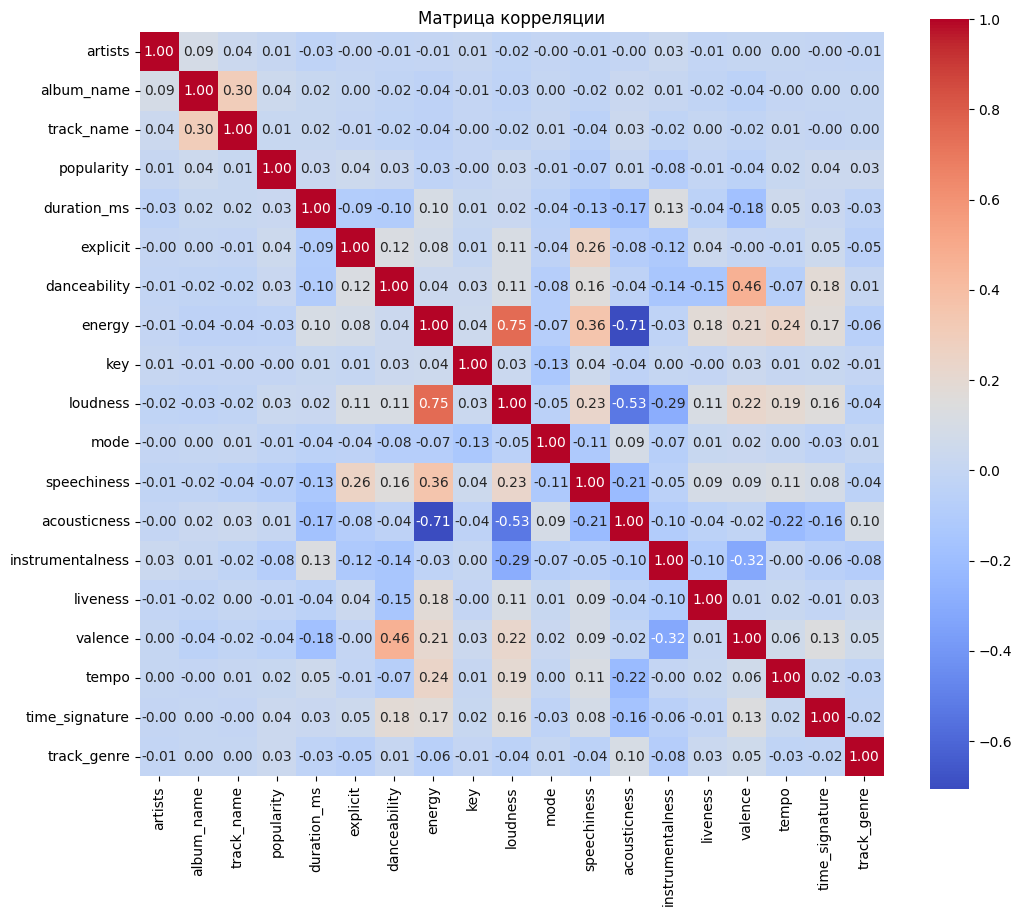

In [14]:
#Отобразим тепловую карту корреляции

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

**Вывод:**
- energy и loudness (0.75): более энергичные треки, как правило, громче
- acousticness и energy (-0.71): акустичные треки менее энергичны
- loudness и (instrumentalness, acousticness) (-0.29, -0.53): громкие треки являются менее акустичными и инструментальными
- danceability и valence (0.46): танцевальные треки более позитивны
- popularity: никакой признак не показывает значительную линейную связь c таргетным значением

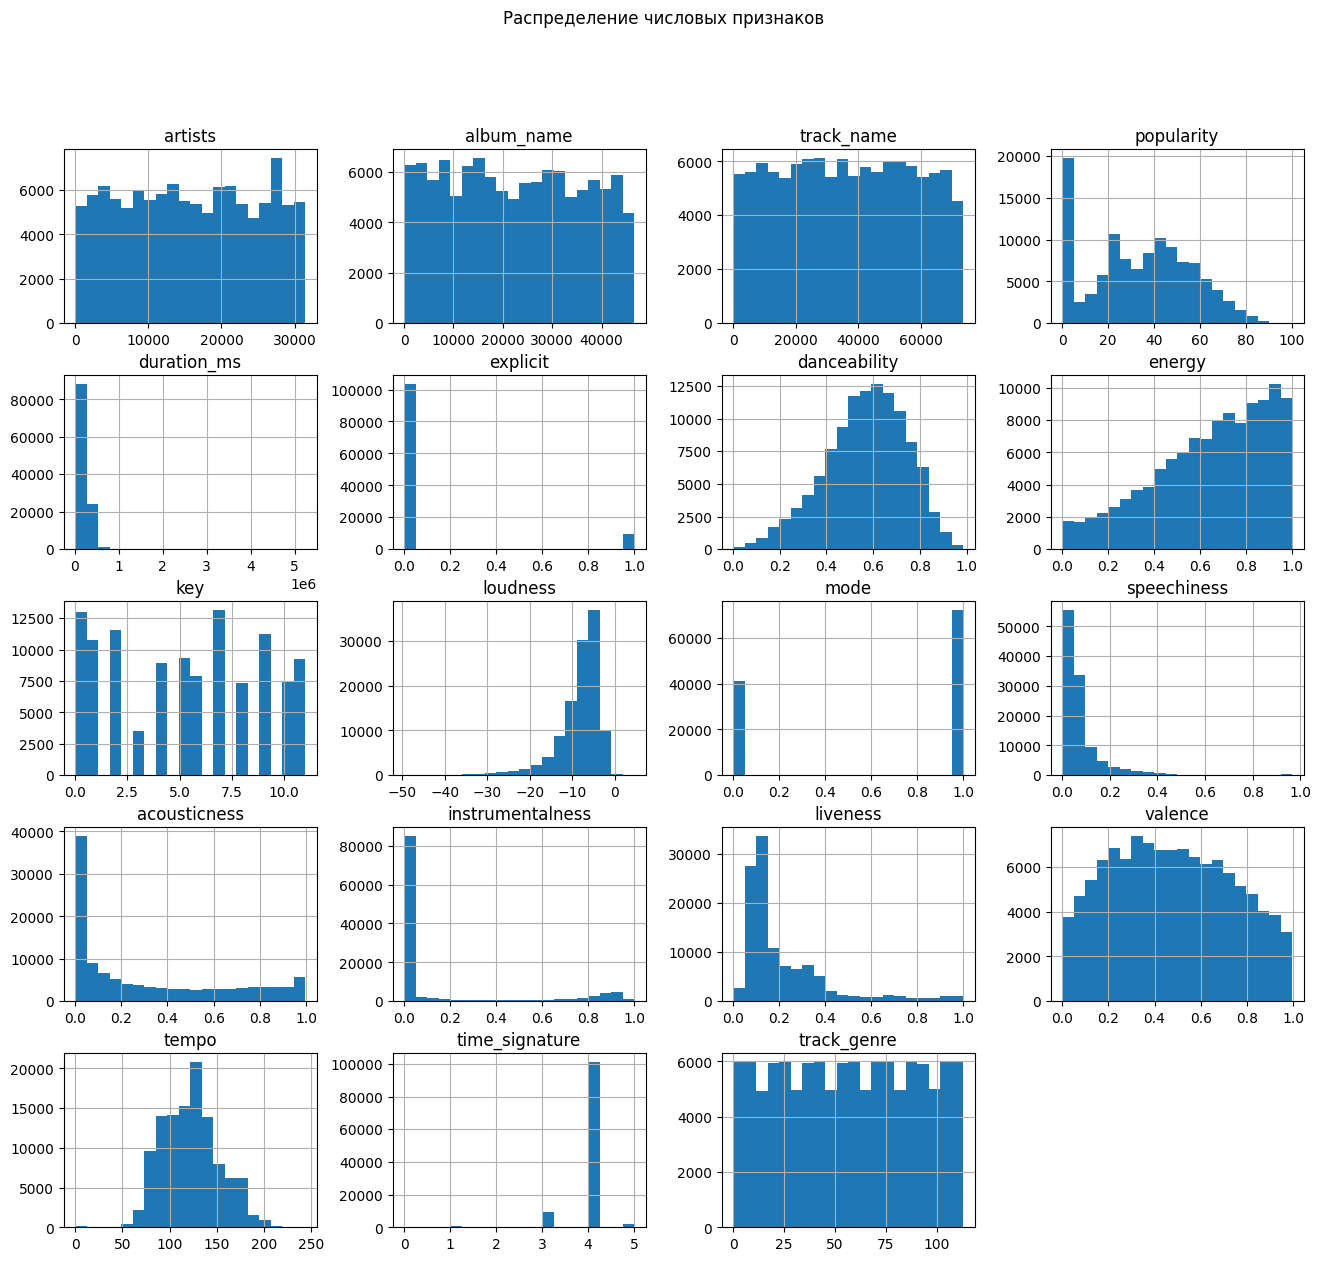

In [15]:
#Отрисуем гистрограммы для оценки распределения числовых признаков

df.hist(figsize=(16, 14), bins=20)
plt.suptitle('Распределение числовых признаков')
plt.show()

**Вывод:**
- popularity: большинство треков не очень популярны, пики на значениях 20-40
- danceability: распределение близкое к нормальному, с центром в районе ~0.6
- energy: равномерно возрастает
- speechiness, instrumentalness, liveness и acousticness: имеют длинные "хвосты", что может свидетельствовать о наличии аномалий или редких значений

In [16]:
#Добавим два столбца для удобства, а именно переведем время из мс в мин, а популярность от 0 до 1
df['duration_min'] = round(df['duration_ms'] / 60000, 3)

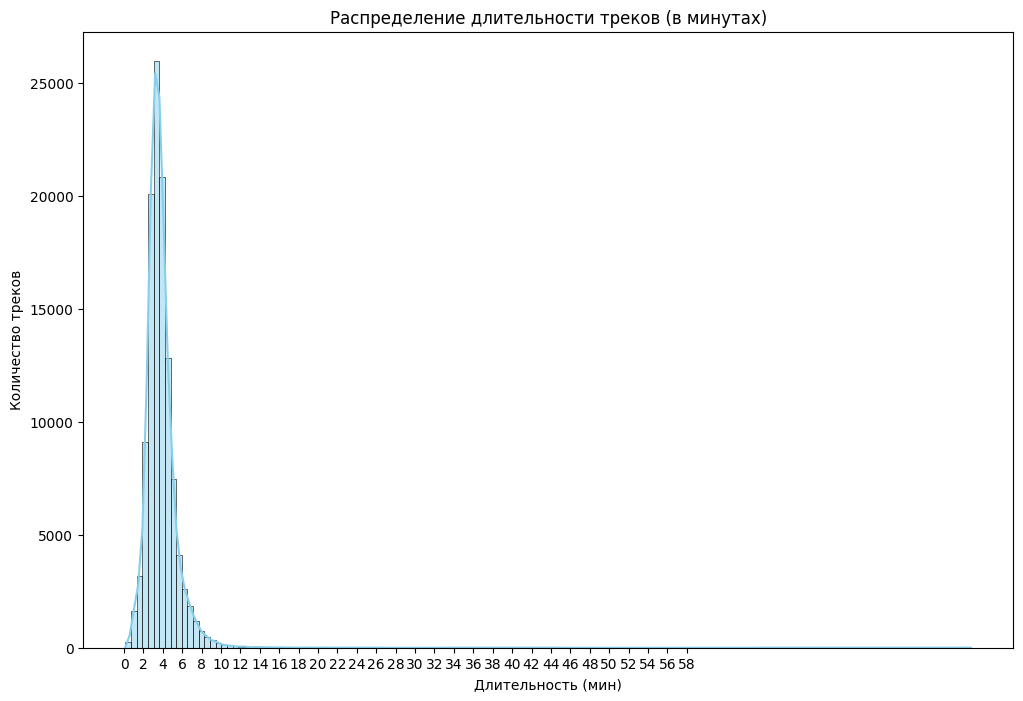

In [17]:
#Отрисуем график распределения длительности треков

plt.figure(figsize=(12, 8))
sns.histplot(df['duration_min'], bins=150, kde=True, color='skyblue')  # Длительность в минутах
plt.title('Распределение длительности треков (в минутах)')
plt.xlabel('Длительность (мин)')
plt.ylabel('Количество треков')
plt.xticks(range(0, 60, 2))
plt.show()

Большинство треков имеют значения продолжительности в диапазоне 3-4  минут

## Feature Engineering

### Создание новых признаков

In [18]:
df['track_length'] = df_clear['track_name'].apply(len)

Эта колонка рассчитывает длину названия трека (количество символов). Может влиять на популярность трека, так как краткие и запоминающиеся названия могут быть более востребованы.

In [19]:
df['energy_loudness'] = df['energy'] * df['loudness']

Позволяет выделить треки с высокой громкостью и энергичностью, что может коррелировать с популярностью

In [20]:
df['loudness_acousticness_ratio'] = df['loudness'] * df['acousticness']

Баланс между акустичностью и громкостью, который может повлиять на восприятие трека слушателями

In [21]:
df['valence_danceability'] = df['valence'] * df['danceability']

Треки с высокой позитивностью и танцевальностью могут быть более популярными на вечеринках и радио

In [22]:
df = df.drop(['artists', 'album_name', 'track_name', 'key', 'duration_ms'], axis=1)

Имеют низкую корреляцию с целевым значением и они не несут значимой информации для дальнейших моделей

In [23]:
df.head()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,track_length,energy_loudness,loudness_acousticness_ratio,valence_danceability
0,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,3.844,6,-3.109906,-0.217221,0.483340
1,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,2.494,16,-2.861010,-15.925140,0.112140
2,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,3.514,14,-3.494506,-2.044140,0.052560
3,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,3.366,26,-1.103494,-16.756075,0.038038
4,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,3.314,7,-4.288683,-4.540389,0.103206


### Feature Importances и модель

In [24]:
#Стандартизация
scaler = StandardScaler()

num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

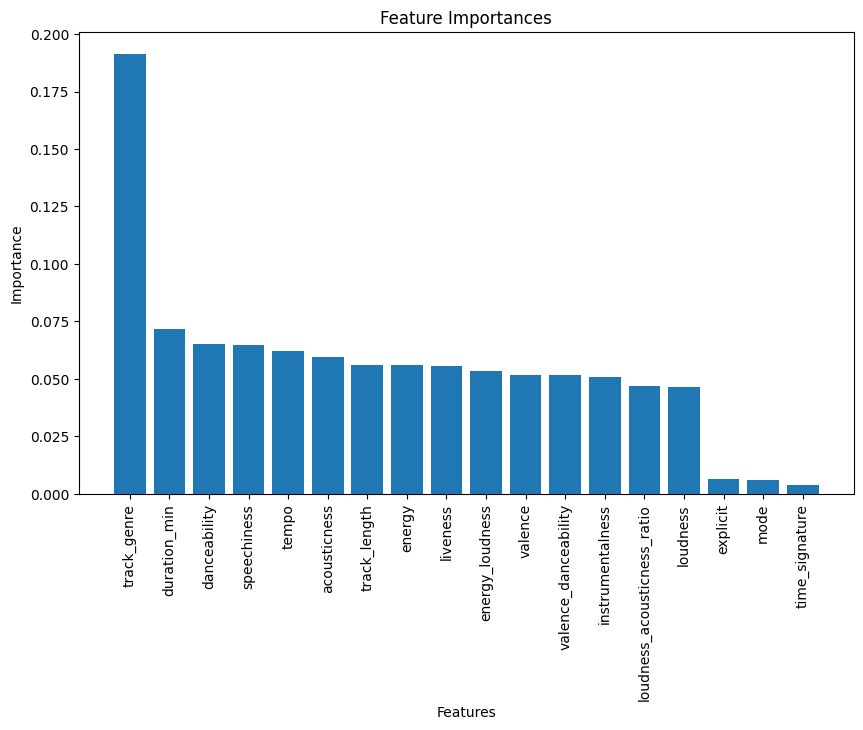

In [25]:
X = df.drop(columns=['popularity']) # Признаки
y = df['popularity'] # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Создаем и обучаем модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Сортируем в порядке убывания

#Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

Жанр трека является важным признаком

## Модели машинного обучения

In [26]:
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression

In [27]:
# Обучаем модель
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Делаем предсказания
y_pred_lr = model_lr.predict(X_test)

# Оценка качества модели
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)

# Вывод результатов
print("Оценка модели:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R^2: {r2_lr:.2f}")
print(f"Среднее значение кросс-валидации: {scores_lr.mean():.4f}")

Оценка модели:
MAE: 0.82
MSE: 0.97
R^2: 0.03
Среднее значение кросс-валидации: 0.0316


### DecisionTreeRegressor

In [28]:
param_grid_dtr = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dtr, cv=5, scoring='r2', n_jobs=-1)
grid_dtr.fit(X_train, y_train)

print("Лучшие параметры для DecisionTreeRegressor:", grid_dtr.best_params_)

Лучшие параметры для DecisionTreeRegressor: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [29]:
model_dtr = DecisionTreeRegressor(max_depth = 15, min_samples_split = 2, min_samples_leaf = 5)
model_dtr.fit(X_train, y_train)

y_pred_dtr = model_dtr.predict(X_test)

# Оценка качества модели
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
scores_dtr = cross_val_score(model_dtr, X_train, y_train, cv=5)

# Вывод результатов
print("Оценка модели:")
print(f"MAE: {mae_dtr:.2f}")
print(f"MSE: {mse_dtr:.2f}")
print(f"R^2: {r2_dtr:.2f}")
print(f"Среднее значение кросс-валидации: {scores_dtr.mean():.4f}")

Оценка модели:
MAE: 0.65
MSE: 0.79
R^2: 0.22
Среднее значение кросс-валидации: 0.1942


### GradientBoostingRegressor

In [30]:
model_gbr = GradientBoostingRegressor(max_depth=8, n_estimators=200, learning_rate=0.1)
model_gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)

# Оценка качества модели
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
scores_gbr = cross_val_score(model_gbr, X_train, y_train, cv=5)

# Вывод результатов
print("Оценка модели:")
print(f"MAE: {mae_gbr:.2f}")
print(f"MSE: {mse_gbr:.2f}")
print(f"R^2: {r2_gbr:.2f}")
print(f"Среднее значение кросс-валидации: {scores_gbr.mean():.4f}")

Оценка модели:
MAE: 0.54
MSE: 0.54
R^2: 0.46
Среднее значение кросс-валидации: 0.4549


### MLPRegressor (Neural Network)

In [31]:
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), activation = 'relu', solver = 'adam', 
                         learning_rate = 'adaptive', max_iter = 500, random_state=42)
model_mlp.fit(X_train, y_train)

y_pred_mlp = model_mlp.predict(X_test)

# Оценка качества модели
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
scores_mlp = cross_val_score(model_mlp, X_train, y_train, cv=5)

# Вывод результатов
print("Оценка модели:")
print(f"MAE: {mae_mlp:.2f}")
print(f"MSE: {mse_mlp:.2f}")
print(f"R^2: {r2_mlp:.2f}")
print(f"Среднее значение кросс-валидации: {scores_mlp.mean():.4f}")

Оценка модели:
MAE: 0.74
MSE: 0.85
R^2: 0.16
Среднее значение кросс-валидации: 0.1485


## Вывод

- *GradientBoostingRegressor* показывает наилучшие результаты по всем метрикам: минимальный MAE, MSE, самое высокое R² и стабильное значение кросс-валидации
- *DecisionTreeRegressor* тоже работает неплохо, но её результаты хуже, чем у GradientBoostingRegressor
- *LinearRegression* и *MLPRegressor* показывают худшие результаты. LinearRegression имеет очень низкий R² и MAE, что означает, что она плохо предсказывает данные. MLPRegressor тоже не стабилен и имеет относительно высокую ошибку, что свидетельствует о недостаточной эффективности нейросетевой модели в данном случае


**GradientBoostingRegressor** — это наиболее подходящая модель для прогнозирования популярности, так как она достигает лучших показателей по всем ключевым метрикам.